In [9]:
%matplotlib inline
import pandas as pd
import dataset

In [11]:
node_id = '001e0610ba16' # 010
# node_id = '001e0610bbf9' # 020

dates = [
    '2017-10-03',
    '2017-10-04',
    '2017-10-05',
    '2017-10-06',
    '2017-10-07',
    '2017-10-08',
    '2017-10-09',
    '2017-10-10',
    '2017-10-11',
]

urlfmt = 'http://www.mcs.anl.gov/research/projects/waggle/downloads/datasets/2/{node_id}/{date}.csv.gz'

df = dataset.load_datasets([urlfmt.format(node_id=node_id, date=date) for date in dates])
df.head()

,APDS-9006-020.intensity,BMI160.acceleration.x,BMI160.acceleration.y,BMI160.acceleration.z,BMI160.index,BMI160.orientation.x,BMI160.orientation.y,BMI160.orientation.z,BMP180.pressure,BMP180.temperature,...,SHT25.temperature,SO2/H2S Temp.adc_temperature,SPV1840LR5H-B.intensity,Si1145.intensity,TMP112.temperature,TMP421.temperature,TSL250RD-AS.intensity,TSL250RD-LS.intensity,TSL260RD.intensity,TSYS01.temperature
2017-10-03 00:00:06,4.0,-69.0,78.0,-867.0,0.0,9.0,11.0,-13.0,99592.0,30.0,...,2934.0,3018.0,821.0,27956.0,29.56,41.0,0.0,24.0,32.0,30.01
2017-10-03 00:00:30,4.0,-68.0,79.0,-869.0,0.0,9.0,11.0,-13.0,99590.0,30.0,...,2934.0,3018.0,821.0,27956.0,29.56,41.0,0.0,24.0,32.0,30.03
2017-10-03 00:00:54,4.0,-69.0,77.0,-868.0,0.0,9.0,11.0,-13.0,99591.0,30.0,...,2934.0,3018.0,821.0,27956.0,29.59,41.0,0.0,24.0,32.0,30.04
2017-10-03 00:01:20,4.0,-71.0,78.0,-868.0,0.0,9.0,11.0,-13.0,99588.0,30.0,...,2934.0,3019.0,821.0,27956.0,29.62,41.0,0.0,24.0,32.0,30.05
2017-10-03 00:01:43,4.0,-68.0,79.0,-867.0,0.0,9.0,11.0,-13.0,99589.0,30.0,...,2935.0,3019.0,821.0,27956.0,29.62,41.0,0.0,24.0,32.0,30.05


In [12]:
plots = {
    'Temperature': {
        'filter': lambda c: 'temperature' in c and 'PR' not in c and 'adc_' not in c,
        'limits': (-20.0, 60.0),
    },
    'Humidity': {
        'filter': lambda c: 'humidity' in c,
        'limits': (0.0, 100.0),
    },
    'Pressure': {
        'filter': lambda c: 'pressure' in c,
    },
    'Intensity': {
        'filter': lambda c: 'intensity' in c and 'MLX' not in c and 'SPV' not in c and 'ML85' not in c,
    },
    'Acceleration': {
        'filter': lambda c: 'MMA8452Q' in c,
    },
    'Magnetic Field': {
        'filter': lambda c: 'HMC5883L' in c,
    },
    'ADC Temperature': {
        'filter': lambda c: 'adc_temperature' in c,
    },
}

def show_plots(df):
    figsize = (16, 9)
    
    for title, options in plots.items():
        columns = list(filter(options['filter'], df.columns))
        
        if len(columns) == 0:
            continue

        df[columns].plot(figsize=figsize, title=title, ylim=options.get('limits', None))

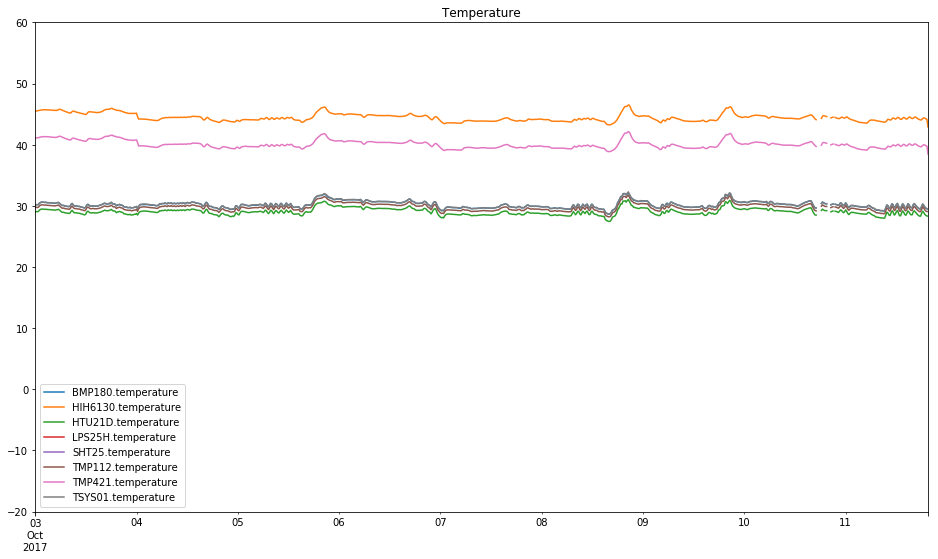

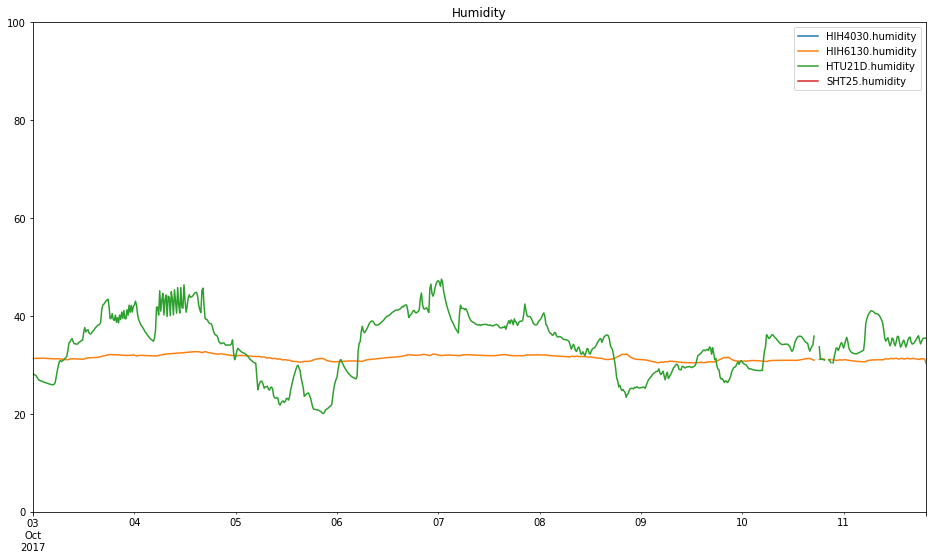

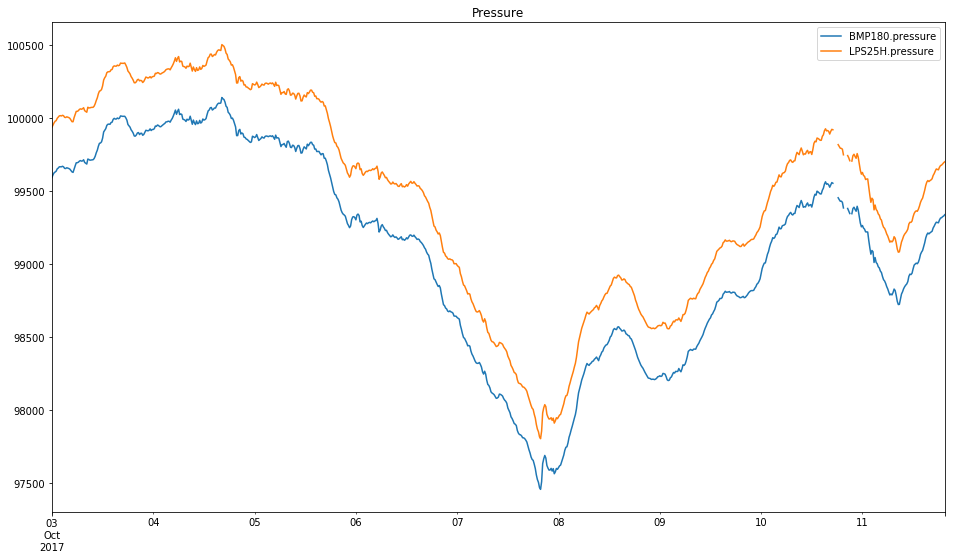

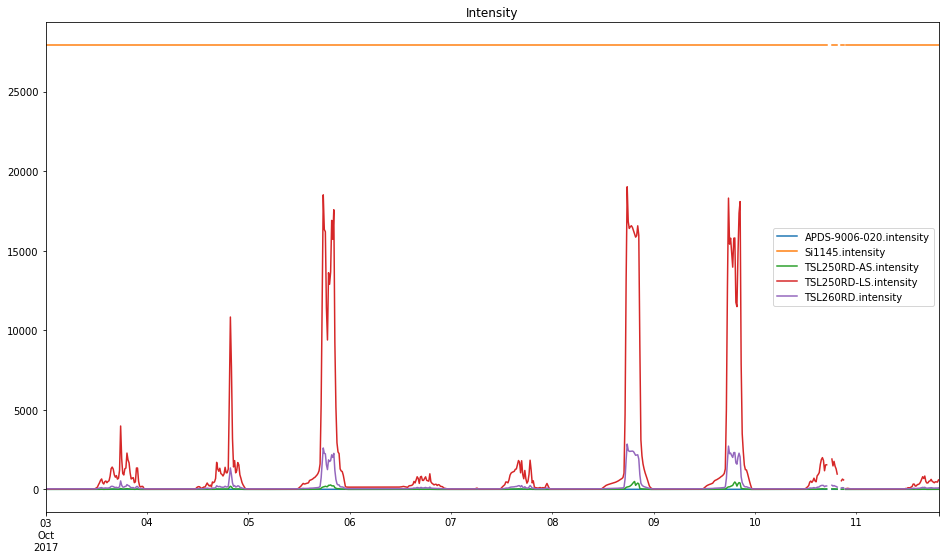

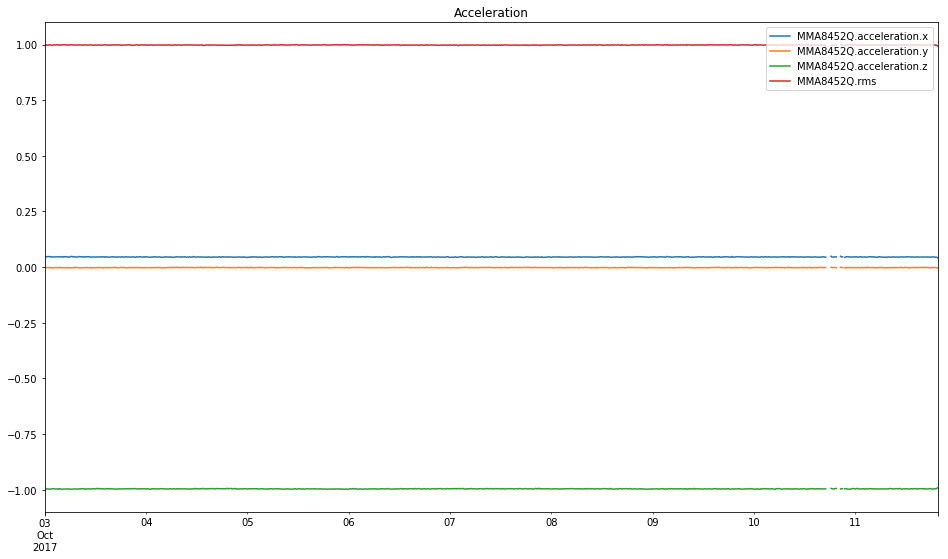

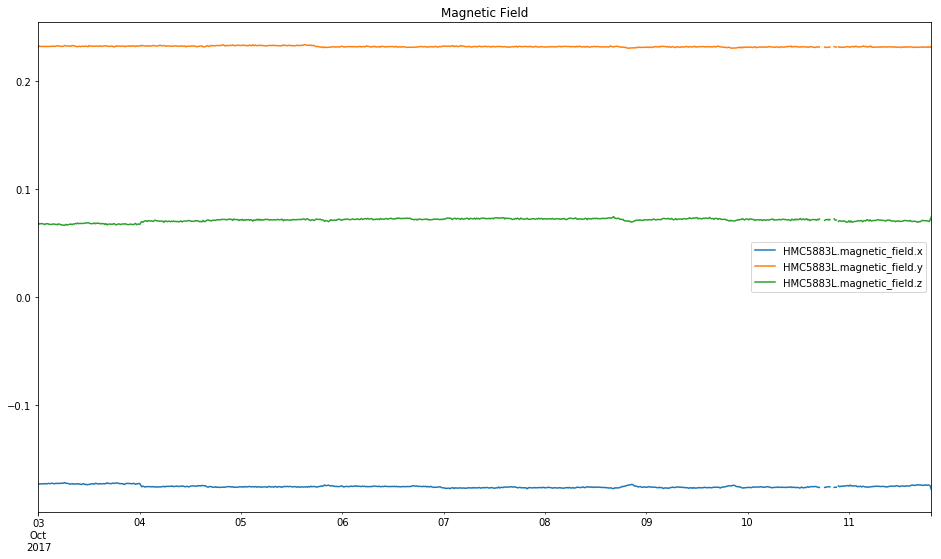

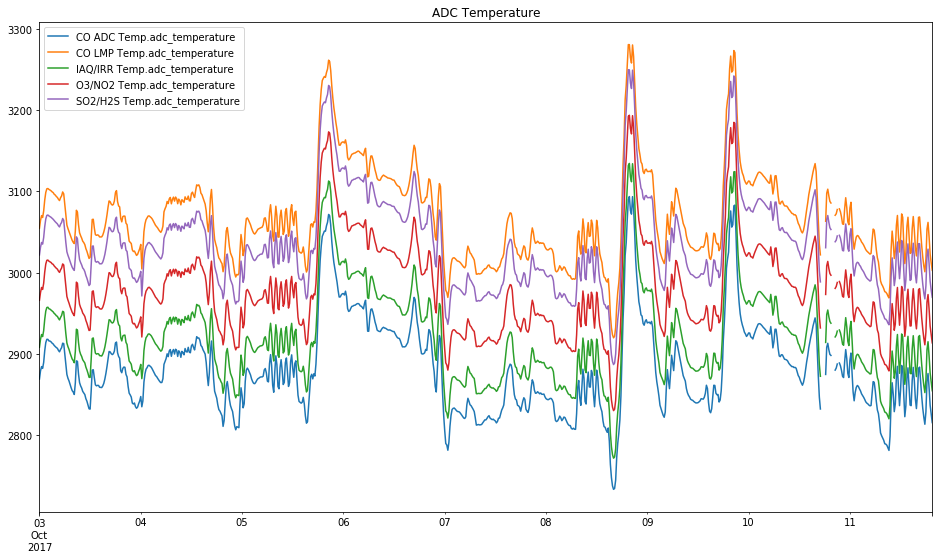

In [13]:
show_plots(df.resample('15Min').mean())